#### **This script checks the graph after filtering based on p-value***

In [4]:
from xnetwork import load

#### **Filter 0**

In [5]:
path="/N/project/INCAS/merge_network/cuba_cohashtag_0.xnet"
graph = load(path)

In [6]:
graph

In [7]:
node_index = 0  # Index of the node you're interested in
attributes = graph.vs[node_index].attributes()


In [8]:
attributes

{'Label': '1000007376'}

In [9]:
graph.vs

In [10]:
graph.vcount()

20166

#### **Filter 10**

In [11]:
from xnetwork import load
path="/N/project/INCAS/merge_network/cuba_cohashtag_10.xnet"
graph_10 = load(path)
graph_10.vcount()

6330

#### **Check the nodes**

In [12]:
from xnetwork import load
path="/N/project/INCAS/merge_network/cuba_cohashtag_10.xnet"
graph_10 = load(path)
graph_10.vcount()

6330

In [13]:
graph_10

In [14]:
def save_xnet_to_gml(xnet_file, filename):
    '''
    Converts xnet graph to GML file
    :param xnet_file: Xnet graph
    :param filename: Name of file to save as gml
    
    :return networkx graph
    '''
    import networkx as nx
    
    G = xnet_file.to_networkx()
    
    for node, attrs in G.nodes(data=True):
        if '_igraph_index' in attrs:
            del attrs['_igraph_index']

    for u, v, attrs in G.edges(data=True):
        if '_igraph_index' in attrs:
            del attrs['_igraph_index']
            
    nx.write_gml(G, filename)
    
    return G

In [15]:
path="/N/project/INCAS/merge_network/cuba_cohashtag_10.xnet"
graph_10 = load(path)
print(graph_10.vcount())

filename="/N/project/INCAS/merge_network/cuba_cohashtag_10.gml"

G = save_xnet_to_gml(graph_10, filename)

6330


In [16]:
import pandas as pd

In [17]:
for node in G.nodes(data=True):
    print(node)
    break
    
def save_edge_attributes(gml_graph, filename):    
    all_data = []
    for u, v, attrs in G.edges(data=True):
        all_data.append([attrs['weight'], attrs['pvalue'], attrs['zscore']])

    (pd.DataFrame(data=all_data,
                  columns=['weight', 'pvalue', 'zscore']
                 )
    ).to_pickle(filename)
    
filename='./data/cuba_network_attributes.pkl.gz'

(0, {'Label': '1000100707'})


#### **Check how the weight, pvalue and zcore are**

In [18]:
filename='./data/cuba_network_attributes.pkl.gz'

df_attr = pd.read_pickle(filename)

In [19]:
df_attr.head()

,weight,pvalue,zscore
0,0.930966,0.001,116.350404
1,0.935297,0.001,118.460888
2,0.935470,0.001,122.219060
3,0.638316,0.001,75.308300
4,0.665785,0.001,78.633088


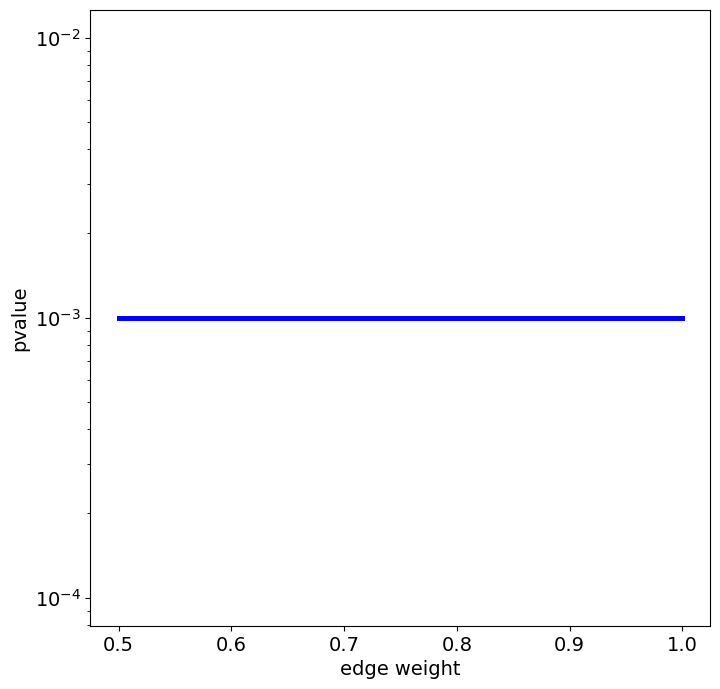

In [24]:
import coordinationz.visualization as vz

parameters =  {
        'data': df_attr,
        'fontsize': 14,
        'columns': {
            'x': 'weight',
            'y': 'pvalue',
        },
        'alpha': 0.5,
        'marker_size': 5,
        'marker': None,
        'xlabel': 'edge weight',
        'ylabel': 'pvalue',
        'legend_location': '',
        'log_yscale': True,
        'log_xscale': False,
        'bins': None,
        'title': f'',
        'save': {
            'path': f'./plots',
            'filename': f'cuba_weight_pvalue.png'
        },
    }

vz.scatter_plot(parameters)

#### **Check sign of coordination**

In [21]:
io_path = '/N/project/INCAS/new_parse/io/cuba_082020_tweets.pkl.gz'
control_path = '/N/project/INCAS/new_parse/control/cuba_082020_tweets_control.pkl.gz'

import coordinationz.cohashtag_helper as cohp

import importlib

importlib.reload(cohp)

df = cohp.preprocess_data(io_path, control_path, 10)

df['label'].unique()

Total control users : 30099
Total io users : 446
Total control data:  1353088
Total IO data:  250367
Loading data, class:  2
Filtering original tweet, class:  2


/N/slate/potem/project/coordinationz/source/coordinationz/cohashtag_helper.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hashtag['list_hashtag'] = df_hashtag['hashtags'].apply(


After filtering: Total control users : 20108
After filtering: Total io users : 58
2
Filtering tweet with hashtag, class:  2
After filtering user with min activity 10
Class 1:  654
Class 2:  390640
Filtering the user with min activity 10, class:  2


array([0, 1])

In [22]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

NameError: name 'nx' is not defined

In [ ]:
all_nodes = []
for node, attr in G0.nodes(data=True):
    all_nodes.append(attr['Label'])

In [ ]:
len(all_nodes)

In [ ]:
df_required = df.loc[df['userid'].isin(all_nodes)]

In [ ]:
len(df_required)

In [ ]:
df_required.columns

In [ ]:
df_required[['hashtags', 'list_hashtag']].head()

In [ ]:
df_required['length'] = df_required['list_hashtag'].apply(
    lambda x: len(x)
)

In [ ]:
df_required['length'].unique()

In [ ]:
parameters =  {
        'data': [df_required],
        'fontsize': 30,
        'complementary': True,
        'tick_size':20,
        'columns': [
            {'column': 'length',
             'label': '',
            }
        ],
        'xlabel': 'Number of hashtags used \n in each tweet',
        'ylabel': '',
        # 'legend_location': '',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': './plots/',
            'filename': 'cuba_number_of_hashtags.png'
        },
        'random_color': False
    }

vz.ccdf(parameters)

In [ ]:
degrees = G0.degree()

#### **Explode**

In [ ]:
df_exp = df_required.explode(['list_hashtag'])

In [ ]:
df_grp = (df_exp
          .groupby(['list_hashtag'])['tweetid']
          .nunique()
          .to_frame('count')
          .reset_index()
          .sort_values(by='count',
                       ascending=False
                      )
         )

In [ ]:
df_grp.head(30)

In [ ]:
df_required[['userid', 'tweet_text']].tail(500).values